In [93]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from nltk.corpus import stopwords # useless words
from tensorflow.keras.preprocessing.text import Tokenizer # seperate words
from tensorflow.keras.preprocessing.sequence import pad_sequences

#**Data Cleaning and Preprocessing**

In [72]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
stopwords = set(stopwords.words('english'))
len(stopwords)

179

In [74]:
labels = []
sentences = []

with open('/content/bbc-text.csv', 'r') as file:
  r = csv.reader(file, delimiter=',')
  next(r)
  for row in r:
    labels.append(row[0])
    s = row[1]
    for word in stopwords:
      token = " " + word + " "
      s = s.replace(token," ")
    sentences.append(s)

print('label: ', labels[0], ', sentence: ', sentences[0])
print(len(labels), len(sentences))

label:  tech , sentence:  tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks 

#**Data Splitting**

In [75]:
train_size = int(len(sentences)*0.8)
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

len(train_sentences)

1780

In [76]:
val_sentences = sentences[train_size:]
val_labels = labels[train_size:]

len(val_sentences)

445

#**split Words and turn to sequence**

In [77]:
t = Tokenizer(1000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', oov_token = '<OOV>')
t.fit_on_texts(sentences)
word_index = t.word_index  # find the length of the vector

seq = t.texts_to_sequences(train_sentences)
seq = pad_sequences(seq, padding = 'post', maxlen = 1000) # turn sequences to arrray

In [78]:
print(seq, len(seq))

[[ 88 165   1 ...   0   0   0]
 [  1 595 239 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 ...
 [  1   1   1 ...   0   0   0]
 [  1  63   1 ...   0   0   0]
 [ 88   1   1 ...   0   0   0]] 1780


In [79]:
vseq = t.texts_to_sequences(val_sentences)
vseq = pad_sequences(vseq, padding = 'post', maxlen = 1000) # turn sequences to arrray

In [80]:
print(vseq, len(vseq))

[[  1   1  96 ...   0   0   0]
 [ 26  63   1 ...   0   0   0]
 [  1 101   1 ...   0   0   0]
 ...
 [  1   1   8 ...   0   0   0]
 [  1 371   1 ...   0   0   0]
 [  1   1 828 ...   0   0   0]] 445


In [81]:
labelt = Tokenizer(1000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', oov_token = '<OOV>')
labelt.fit_on_texts(labels)

lseq = np.array(labelt.texts_to_sequences(train_labels))
lvseq = np.array(labelt.texts_to_sequences(val_labels))

In [82]:
seq[0], vseq[0]

(array([ 88, 165,   1,   1,  48,   1, 726,   1,  77,   1,   1, 137, 173,
          1,   1,   1,   1,  41,   7, 935,  88,   1, 316,  84,  19,  14,
        130,   1,   1,   1, 562, 406,   1,  65,   1,   1,   1,   8, 881,
        739,  10, 940,   1,   9, 641,   1,   1, 401,   1,   1, 764,  48,
        488,   1,   1,   1, 125, 320, 114,   1, 803,   1,   1, 594,  10,
          1,   1, 881,   1, 137, 338, 173,   1,   1,   1,  38,  66,   1,
         25,   9,   1,  18,   1, 135, 441,   7, 128,   1,  74,   1, 474,
          1,  88,   1,  79,   1,  75,   1,  56,   1,  88,   6,   1, 619,
         77,   1,  88,   1, 138, 149, 407,   9,   1,  40, 139,   1,  77,
          1,   1,   7, 474,   1,   1,   6,   1,   1, 399,   1,   1,   1,
        601,   1,   1,   1, 740,   9, 488,   1,   1, 125,   1, 397, 882,
          1,   1,  37,   1,   1,   1,   1,   1, 238,   9,   1,  75, 804,
          6,   1,   1, 139, 783, 563,   1, 126,  25,   1,   1, 432,  82,
        941, 109,  19,  14,  18,   1,   1,  36,   1

#**Building and Training the RNN model**

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, output_dim = 16, input_length = 1),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(7, activation = 'softmax')
])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 1, 16)             16000     
                                                                 
 global_average_pooling1d_14  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_30 (Dense)            (None, 24)                408       
                                                                 
 dense_31 (Dense)            (None, 7)                 175       
                                                                 
Total params: 16,583
Trainable params: 16,583
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [91]:
h = model.fit(
    seq,
    lseq,
    epochs = 30,
    validation_data = (vseq, lvseq),
    verbose = 2
)

Epoch 1/30


56/56 - 1s - loss: 1.9035 - accuracy: 0.2303 - val_loss: 1.8495 - val_accuracy: 0.2270 - 1s/epoch - 26ms/step
Epoch 2/30
56/56 - 0s - loss: 1.7885 - accuracy: 0.2303 - val_loss: 1.7190 - val_accuracy: 0.2270 - 415ms/epoch - 7ms/step
Epoch 3/30
56/56 - 0s - loss: 1.6742 - accuracy: 0.2303 - val_loss: 1.6331 - val_accuracy: 0.2270 - 427ms/epoch - 8ms/step
Epoch 4/30
56/56 - 0s - loss: 1.6182 - accuracy: 0.2506 - val_loss: 1.6060 - val_accuracy: 0.2944 - 424ms/epoch - 8ms/step
Epoch 5/30
56/56 - 0s - loss: 1.5962 - accuracy: 0.2809 - val_loss: 1.5877 - val_accuracy: 0.4292 - 358ms/epoch - 6ms/step
Epoch 6/30
56/56 - 0s - loss: 1.5790 - accuracy: 0.3522 - val_loss: 1.5731 - val_accuracy: 0.2404 - 346ms/epoch - 6ms/step
Epoch 7/30
56/56 - 0s - loss: 1.5648 - accuracy: 0.2854 - val_loss: 1.5548 - val_accuracy: 0.2697 - 401ms/epoch - 7ms/step
Epoch 8/30
56/56 - 0s - loss: 1.5449 - accuracy: 0.3511 - val_loss: 1.5321 - val_accuracy: 0.3056 - 406ms/epoch - 7ms/step
Epoch 9/30
56/56 - 1s - loss:

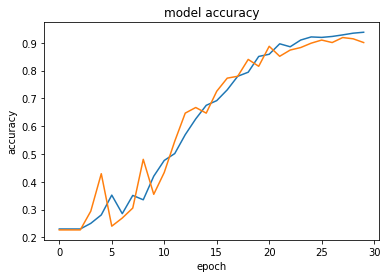

In [94]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

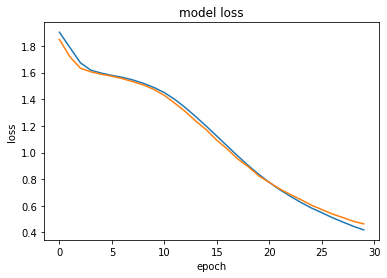

In [95]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()